In [3]:
pip install editdistance


   ---------------------------------------- 0.0/79.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/79.7 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/79.7 kB ? eta -:--:--
   --------------- ------------------------ 30.7/79.7 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 79.7/79.7 kB 637.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import editdistance
import random

In [30]:
# Chemins fictifs des fichiers texte
aligned_words_file = 'C:/Users/beaujo/Desktop/qualiéocrestim/sortie_ocr.txt'
aligned_gs_words_file = 'C:/Users/beaujo/Desktop/qualiéocrestim/Ground_Truth.txt'

# Chargement des fichiers texte
with open(aligned_words_file, 'r', encoding='utf-8') as f:
    aligned_words = f.readlines()

with open(aligned_gs_words_file, 'r', encoding='utf-8') as f:
    aligned_gs_words = f.readlines()

# Nettoyage des lignes (enlever les sauts de ligne)
aligned_words = [line.strip() for line in aligned_words]
aligned_gs_words = [line.strip() for line in aligned_gs_words]

<Axes: >

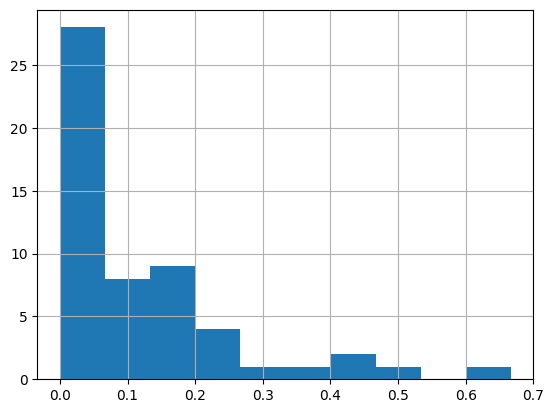

In [31]:
######################## calcul et affichage de la distanc de levinstein de notre corpus
sent_stat = pd.DataFrame({"ocr_sentence": aligned_words, "gs_sentence": aligned_gs_words})

def compute_sent_edit_distance(x):
    ''' Compute sentence edit distance normalized by the length of the sentence'''
    ocr_sent = "".join(x['ocr_sentence'])
    gs_sent = "".join(x['gs_sentence'])
    return editdistance.distance(ocr_sent, gs_sent) / max(len(ocr_sent), len(gs_sent))

sent_stat["sent_edit_distance"] = sent_stat.apply(compute_sent_edit_distance, axis=1)
### generation du graphique 
sent_stat["sent_edit_distance"].hist()

In [32]:
########################## comptage des bonne et mauvaise phrase de notre corpus

MAXIMUM_AVERAGE_EDIT_DISTANCE_RATE = 0.00
total_sent = sent_stat.shape[0]
good_sent = (sent_stat["sent_edit_distance"] <= MAXIMUM_AVERAGE_EDIT_DISTANCE_RATE).sum()
good_sent_ratio = good_sent / total_sent
print("Bonnes phrases: %s\nPhrases totales: %s\nRatio de bonnes phrases: %s" % (good_sent, total_sent, good_sent_ratio))

Bonnes phrases: 18
Phrases totales: 55
Ratio de bonnes phrases: 0.32727272727272727


In [37]:
################# visuel de distance d'edition entre les phrase ocr et la traduction de reference

good_sentences_stat = sent_stat[sent_stat["sent_edit_distance"] <= MAXIMUM_AVERAGE_EDIT_DISTANCE_RATE]
i = random.randint(0, good_sentences_stat.shape[0] - 1)

good_sentences_stat[i: i + 8].sort_values("sent_edit_distance", ascending=False)

,ocr_sentence,gs_sentence,sent_edit_distance
38,"Av. des Nerviens, 13.","Av. des Nerviens, 13.",0.0
39,5683,5683,0.0
40,BERLITZ,BERLITZ,0.0
41,Nouveaux Cours Anglais Français Espagnol Allem...,Nouveaux Cours Anglais Français Espagnol Allem...,0.0
47,Ecr. 9909 bur. journ,Ecr. 9909 bur. journ,0.0
50,"Académie de Culture Française, 34 rue du Mail ...","Académie de Culture Française, 34 rue du Mail ...",0.0
52,Comptable,Comptable,0.0
53,Expert-comptable,Expert-comptable,0.0


In [35]:
# Calcul de la distance d'édition moyenne pour tout le corpus
average_edit_distance = sent_stat["sent_edit_distance"].mean()

print("Distance d'édition moyenne de tout le corpus : %.2f" % average_edit_distance)

Distance d'édition moyenne de tout le corpus : 0.12
